Rupesh Bharambe (AI3107)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
# Generator network
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 784),
            nn.Tanh()  # Output between -1 and 1
        )

    def forward(self, x):
        return self.gen(x)

In [4]:
# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dis = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output a probability
        )

    def forward(self, x):
        return self.dis(x)


In [5]:
# Hyperparameters
z_dim = 64
batch_size = 128
lr = 0.0002
epochs = 50


In [6]:
# Data loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize between -1 and 1
])

dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:07<00:00, 1.40MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 64.6kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.05MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.51MB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [7]:
# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

In [8]:
# Loss and optimizers
criterion = nn.BCELoss()
opt_gen = optim.Adam(gen.parameters(), lr=lr)
opt_disc = optim.Adam(disc.parameters(), lr=lr)


Epoch [1/50] Loss D: 0.6970, Loss G: 0.9209
Epoch [2/50] Loss D: 0.7104, Loss G: 1.0878
Epoch [3/50] Loss D: 0.8664, Loss G: 1.1047
Epoch [4/50] Loss D: 0.9885, Loss G: 1.1874
Epoch [5/50] Loss D: 0.5760, Loss G: 1.5676
Epoch [6/50] Loss D: 1.2501, Loss G: 0.8134
Epoch [7/50] Loss D: 0.8988, Loss G: 1.2107
Epoch [8/50] Loss D: 1.0080, Loss G: 1.1124
Epoch [9/50] Loss D: 0.7895, Loss G: 1.2707
Epoch [10/50] Loss D: 1.6277, Loss G: 0.6094


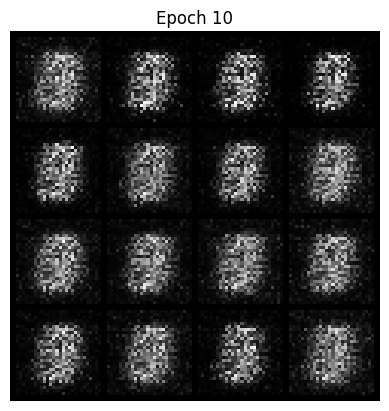

Epoch [11/50] Loss D: 1.0999, Loss G: 1.0498
Epoch [12/50] Loss D: 0.4534, Loss G: 1.9641
Epoch [13/50] Loss D: 0.8003, Loss G: 1.2451
Epoch [14/50] Loss D: 1.3031, Loss G: 0.8138
Epoch [15/50] Loss D: 1.2502, Loss G: 0.9154
Epoch [16/50] Loss D: 1.4351, Loss G: 0.7993
Epoch [17/50] Loss D: 0.8802, Loss G: 1.2804
Epoch [18/50] Loss D: 1.3372, Loss G: 0.8688
Epoch [19/50] Loss D: 1.0016, Loss G: 1.1578
Epoch [20/50] Loss D: 0.5043, Loss G: 1.7096


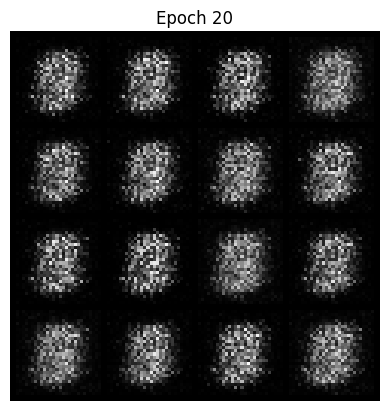

Epoch [21/50] Loss D: 1.5582, Loss G: 0.7312
Epoch [22/50] Loss D: 1.2923, Loss G: 0.8853
Epoch [23/50] Loss D: 1.5589, Loss G: 0.7699
Epoch [24/50] Loss D: 0.8466, Loss G: 1.1684
Epoch [25/50] Loss D: 1.0454, Loss G: 1.1983
Epoch [26/50] Loss D: 1.2400, Loss G: 1.1083
Epoch [27/50] Loss D: 1.2314, Loss G: 1.1819
Epoch [28/50] Loss D: 0.7430, Loss G: 1.3458
Epoch [29/50] Loss D: 1.1809, Loss G: 0.8653
Epoch [30/50] Loss D: 1.4782, Loss G: 0.7587


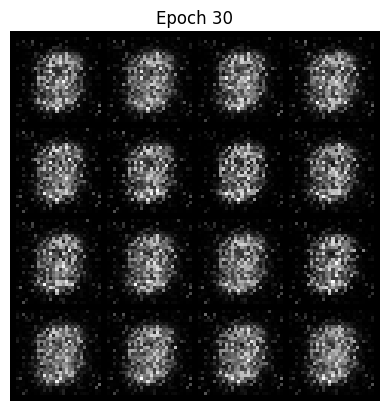

Epoch [31/50] Loss D: 1.2162, Loss G: 1.1298
Epoch [32/50] Loss D: 0.8353, Loss G: 1.5352
Epoch [33/50] Loss D: 0.6012, Loss G: 1.6645
Epoch [34/50] Loss D: 1.2793, Loss G: 0.8820
Epoch [35/50] Loss D: 1.4434, Loss G: 0.9364
Epoch [36/50] Loss D: 1.3046, Loss G: 0.9090
Epoch [37/50] Loss D: 1.2417, Loss G: 1.0862
Epoch [38/50] Loss D: 0.7585, Loss G: 1.4786
Epoch [39/50] Loss D: 1.2460, Loss G: 1.0153
Epoch [40/50] Loss D: 1.1586, Loss G: 1.2171


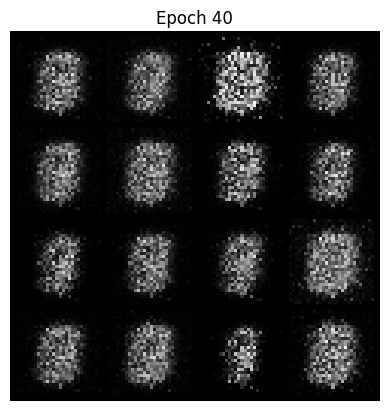

Epoch [41/50] Loss D: 1.2830, Loss G: 1.0236
Epoch [42/50] Loss D: 1.0129, Loss G: 1.1963
Epoch [43/50] Loss D: 1.2890, Loss G: 1.0159
Epoch [44/50] Loss D: 1.2627, Loss G: 1.1281
Epoch [45/50] Loss D: 0.9581, Loss G: 1.2227
Epoch [46/50] Loss D: 1.1527, Loss G: 1.1212
Epoch [47/50] Loss D: 0.9199, Loss G: 1.3381
Epoch [48/50] Loss D: 1.5870, Loss G: 0.8932
Epoch [49/50] Loss D: 0.8221, Loss G: 1.3722
Epoch [50/50] Loss D: 1.1280, Loss G: 1.0337


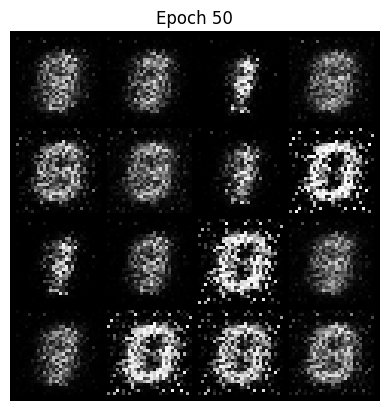

In [9]:
# Training loop
for epoch in range(epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)
        batch_size = real.size(0)

        # Labels
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real = disc(real)
        disc_fake = disc(fake.detach())
        loss_disc = criterion(disc_real, real_labels) + criterion(disc_fake, fake_labels)
        opt_disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()

        # Train Generator
        output = disc(fake)
        loss_gen = criterion(output, real_labels)  # Try to fool discriminator
        opt_gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

    print(f"Epoch [{epoch+1}/{epochs}] Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}")

    # Save sample images every 10 epochs
    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_noise = torch.randn(16, z_dim).to(device)
            fake_images = gen(test_noise).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(fake_images, nrow=4, normalize=True)
            plt.imshow(grid.permute(1, 2, 0).cpu())
            plt.title(f"Epoch {epoch+1}")
            plt.axis('off')
            plt.show()
